# **Task-2**
The goal of this task is to develop a machine learning model that accurately estimates the price of different car models.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
#checking missing value
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [7]:
df.duplicated().sum()

2

In [8]:
#In capital letters
def text_upper(text):
  text = text.str.upper()
  return text

cat = df.select_dtypes(include='O')
for c in cat:
  df[c] = text_upper(df[c])
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0


In [9]:
columns = df['Car_Name'].str.split(' ',1,expand=True)
df['Names'] = columns[0]

<ipython-input-9-c2b5c0667418>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  columns = df['Car_Name'].str.split(' ',1,expand=True)


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
data = df.drop('Car_Name',axis=1)
data = data[data['Owner']!=3]

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Names
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0,RITZ
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0,SX4
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0,CIAZ
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0,WAGON
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0,SWIFT


In [14]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [15]:
#duplicated data is removed now checking for unique values
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
Names             44
dtype: int64



*   We have 98 cars models each with unique attributes.
*   Minimum Selling Price range of cars is 0.100000


*   Maximum selling price range of cars is 35.000000.
*   Average selling price is 4.589632.






In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-17-0970210b6479>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hm = hm.corr()


<Axes: >

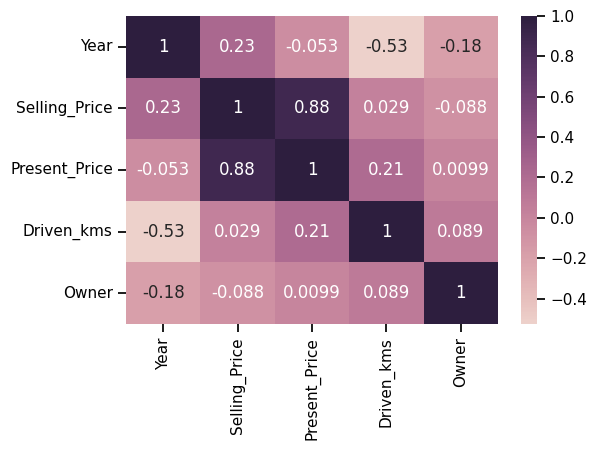

In [17]:
hm = df[['Car_Name','Year','Selling_Price','Present_Price','Driven_kms','Fuel_Type','Selling_type','Transmission','Owner','Names']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook',font_scale = 1)
sns.heatmap(data=hm,annot=True,cmap=sns.cubehelix_palette(as_cmap=True))

In [18]:
import plotly.express as px

In [19]:
plot_unemp = df[['Names','Selling_Price']]
df_unemployed = plot_unemp.groupby('Names').mean().reset_index()

df_unemployed  = df_unemployed.sort_values('Selling_Price')

fig = px.bar(df_unemployed,x='Names',y='Selling_Price',color='Names',title='Sales Value by Car Name',template = 'seaborn')
fig.show()

Suzuki and fortuner has the highest sales value.

In [20]:
plot_unemp = df[['Names','Present_Price']]
df_unemployed = plot_unemp.groupby('Names').mean().reset_index()

df_unemployed  = df_unemployed.sort_values('Present_Price')

fig = px.bar(df_unemployed,x='Names',y='Present_Price',color='Names',title='Current Sales Value by Car Name',template = 'seaborn')
fig.show()

Land is the highest currently selled car.

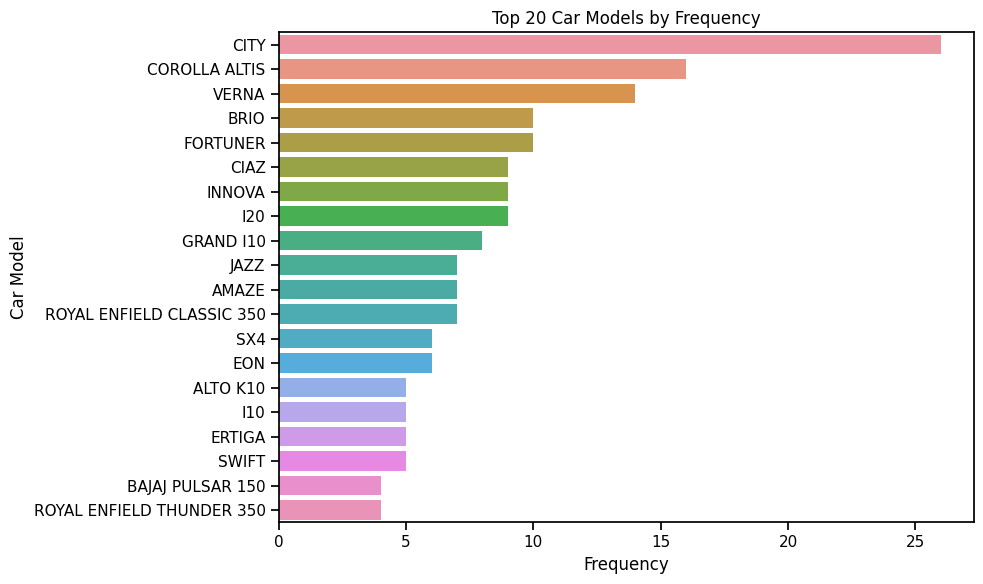

In [21]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [22]:
def plot_count(x, hue, title):
    plt.figure(figsize=(18,4))
    sns.countplot(x=df[x], hue=df[hue])
    plt.title(f'{title} {x} by {hue}', fontsize=16, fontweight='bold')
    plt.tick_params(axis='x', labelrotation=90, labelsize=12)
    plt.xlabel(x, fontsize=14)
    return plt.show()


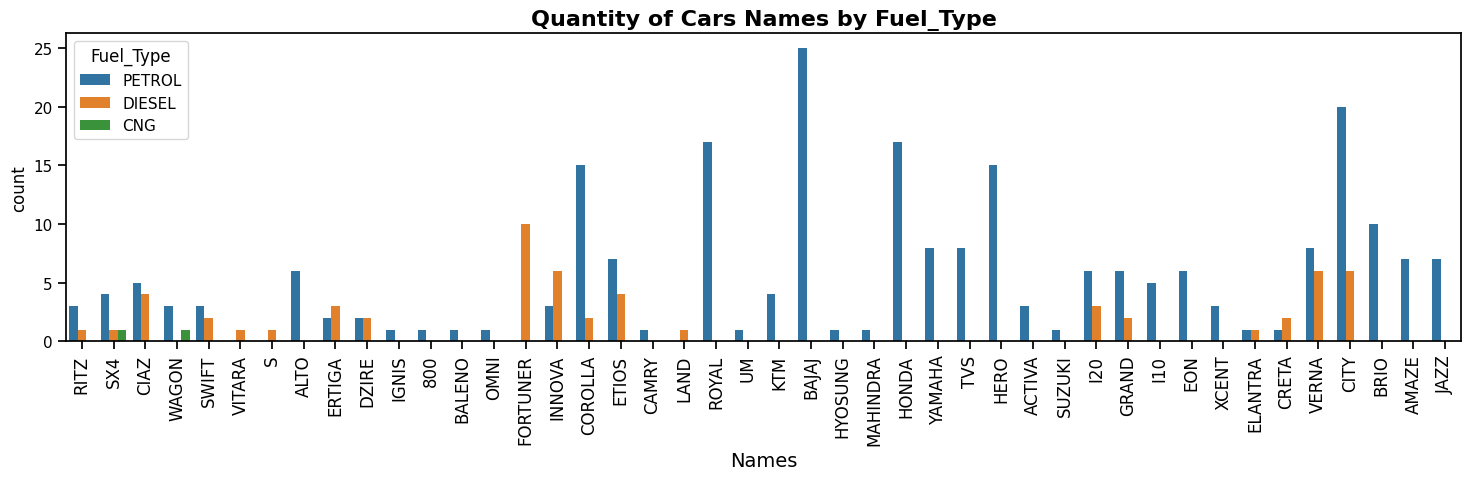

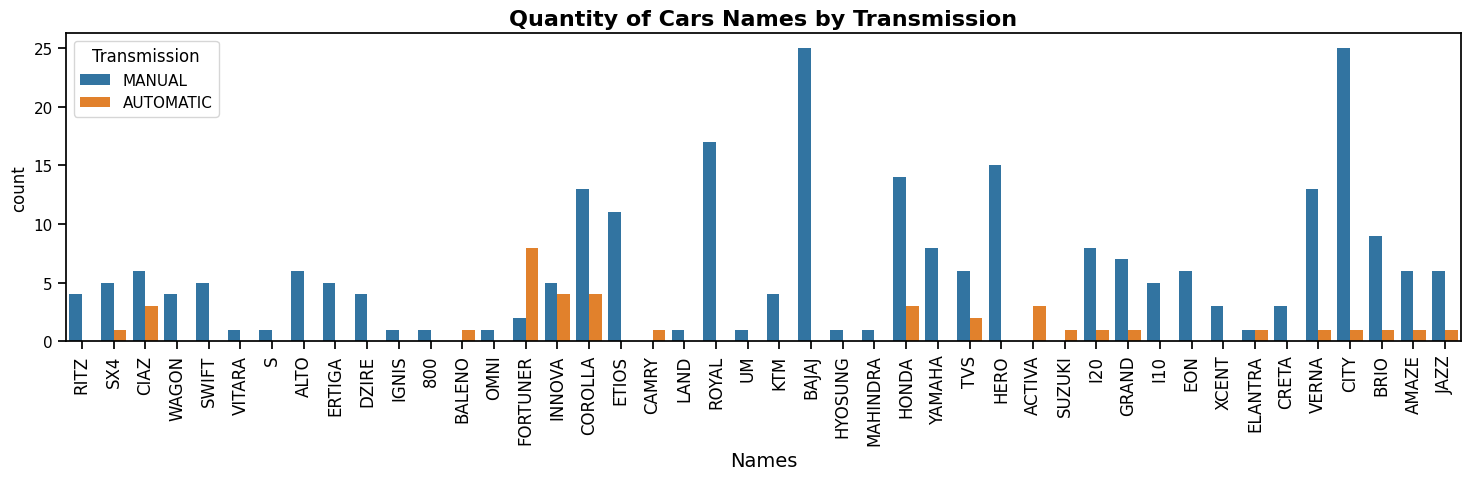

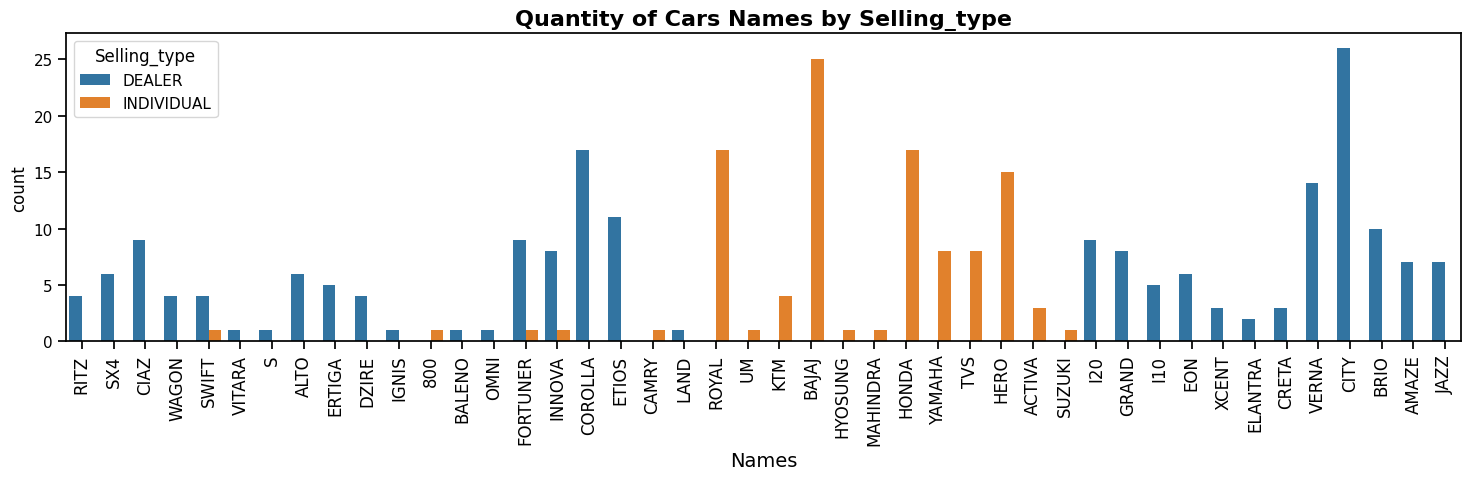

In [23]:
plot_count('Names','Fuel_Type','Quantity of Cars')
plot_count('Names','Transmission','Quantity of Cars')
plot_count('Names','Selling_type','Quantity of Cars')



*   Bajaj has the highest sell over petrol, and is manual in transmission.
*   City car model is sold highest by dealer and bajaj is highly bought by the individual.



In [26]:
def plot_bar(x,y,title):
    plt.figure(figsize=(18,4))
    sns.barplot(x=df[x], y=df[y],palette=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',rotation=90,labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()

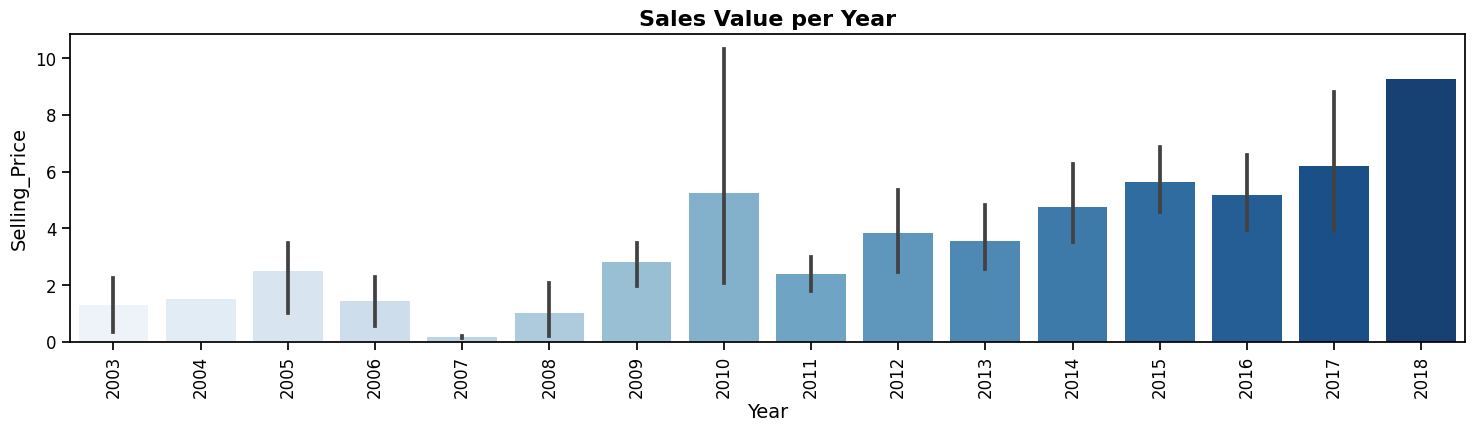

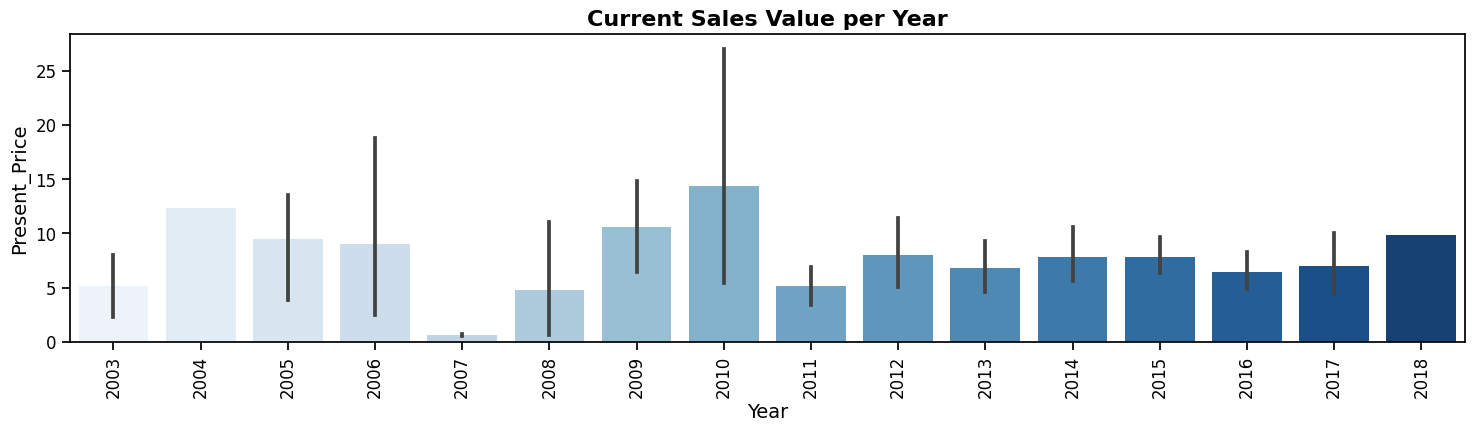

In [28]:
color = 'Blues'  # or any other valid seaborn or matplotlib color palette
plot_bar('Year', 'Selling_Price', 'Sales Value per Year')
plot_bar('Year', 'Present_Price', 'Current Sales Value per Year')



*   2018 year has the highest sales in car according to selling price and 2010 year has the highest sales in car according to the currently running price.



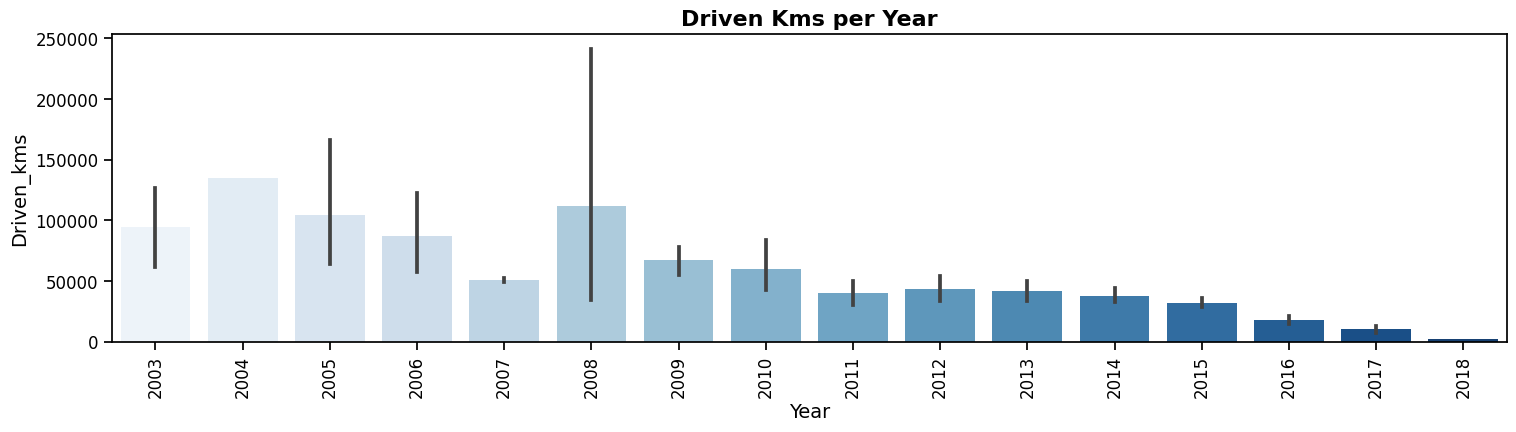

In [29]:
plot_bar('Year','Driven_kms','Driven Kms per Year')

In [30]:
def plot_scatter(x,y,title):
    plt.figure(figsize=(18,4))
    sns.scatterplot(x=df[x], y=df[y], palette=color)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tick_params(axis='x',labelsize=12)
    plt.tick_params(axis='y',labelsize=12)
    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)
    return plt.show()

<ipython-input-30-2726e52beacb>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



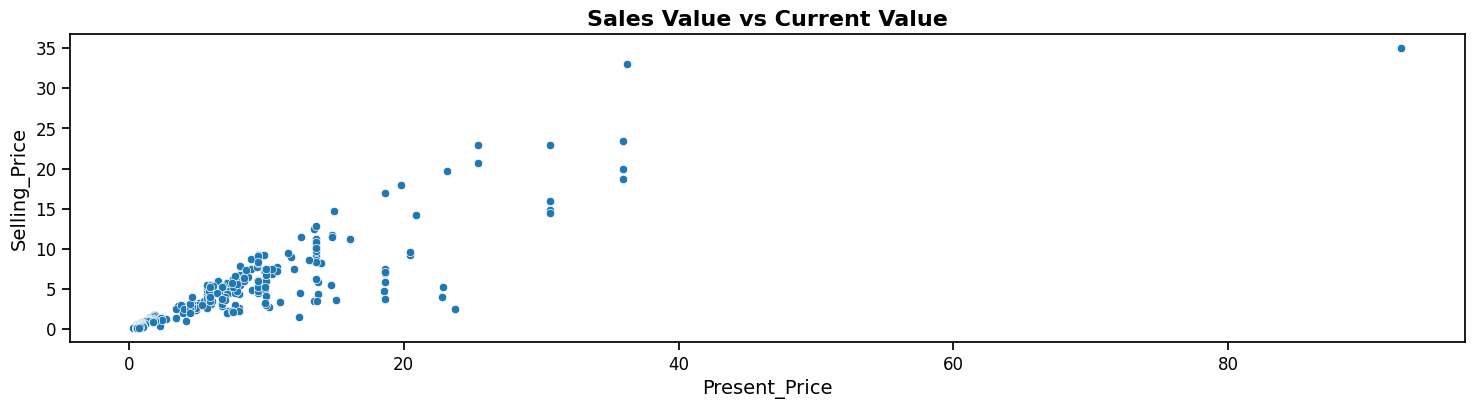

<ipython-input-30-2726e52beacb>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



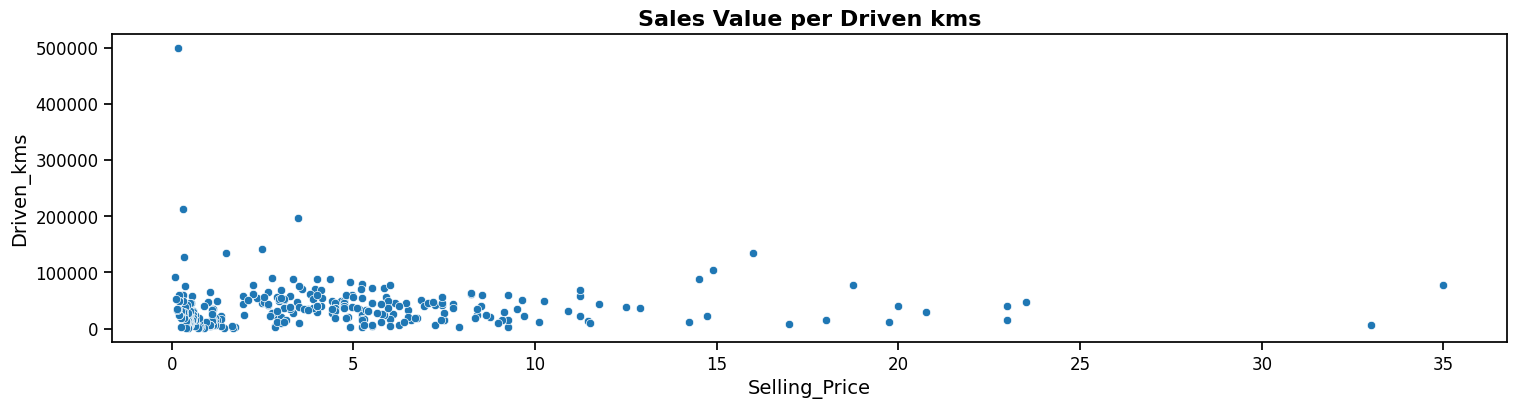

<ipython-input-30-2726e52beacb>:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



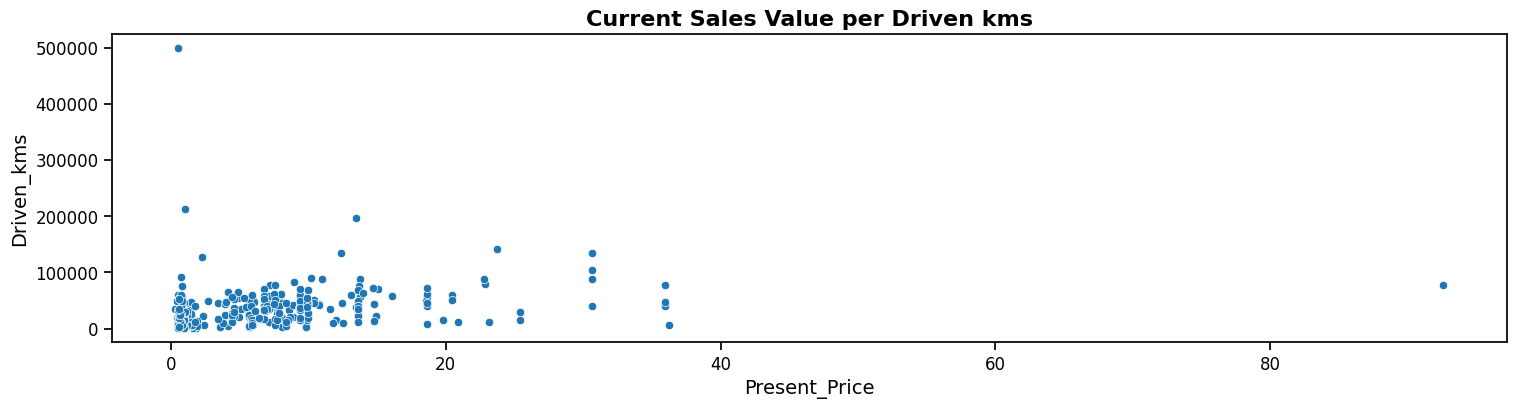

In [31]:
plot_scatter('Present_Price','Selling_Price','Sales Value vs Current Value')
plot_scatter('Selling_Price','Driven_kms','Sales Value per Driven kms')
plot_scatter('Present_Price', 'Driven_kms','Current Sales Value per Driven kms')

# Model Building

In [32]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Names
0,RITZ,2014,3.35,5.59,27000,PETROL,DEALER,MANUAL,0,RITZ
1,SX4,2013,4.75,9.54,43000,DIESEL,DEALER,MANUAL,0,SX4
2,CIAZ,2017,7.25,9.85,6900,PETROL,DEALER,MANUAL,0,CIAZ
3,WAGON R,2011,2.85,4.15,5200,PETROL,DEALER,MANUAL,0,WAGON
4,SWIFT,2014,4.60,6.87,42450,DIESEL,DEALER,MANUAL,0,SWIFT


In [42]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [62]:
cat = data.select_dtypes(include='O')

encode = list(cat)

le = LabelEncoder()
data[encode] = data[encode].apply(lambda col: le.fit_transform(col))
data[encode]

,Fuel_Type,Selling_type,Transmission,Names
0,2,0,1,30
1,1,0,1,35
2,2,0,1,7
3,2,0,1,40
4,1,0,1,34
...,...,...,...,...
296,1,0,1,8
297,2,0,1,6
298,2,0,1,8
299,1,0,1,8


In [63]:
y = data.Owner
x = data.drop('Owner',axis=1)

<Axes: ylabel='Owner'>

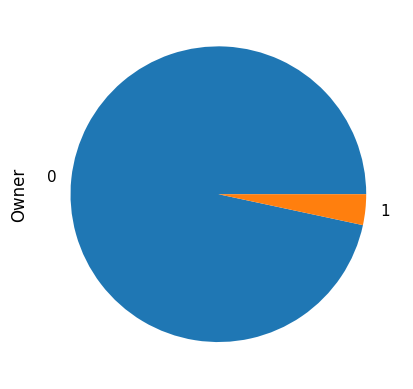

In [64]:
y.value_counts().plot.pie()

# Train the Model

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score

In [65]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [84]:
from imblearn.over_sampling import SMOTE

<Axes: ylabel='Owner'>

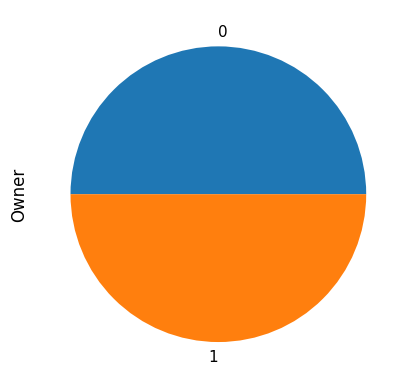

In [83]:
smote = SMOTE()

x_train, y_train = smote.fit_resample(x_train, y_train)

y_train.value_counts().plot.pie()

In [66]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test, y_test)

0.9833333333333333

In [73]:
score = cross_val_score(lr, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.95833333 0.95833333 0.95833333 0.9787234  0.95744681]
----------------------------------------
SCORE: 0.9622340425531914


# Importing

In [74]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

# Random Forest

In [79]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
forest.score(x_test, y_test)

0.9166666666666666

In [76]:
score = cross_val_score(forest, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.95833333 0.97916667 0.9375     0.9787234  0.9787234 ]
----------------------------------------
SCORE: 0.9664893617021276


# Gradient Boosting

In [77]:
grade = GradientBoostingClassifier()
grade.fit(x_train,y_train)
grade.score(x_test, y_test)

0.9833333333333333

In [78]:
score = cross_val_score(grade, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('-'*40)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.95833333 0.9375     0.97916667 0.95744681 0.91489362]
----------------------------------------
SCORE: 0.949468085106383


# Extra Trees

In [80]:
extra = ExtraTreesClassifier()
extra.fit(x_train,y_train)
extra.score(x_test, y_test)

0.9333333333333333

In [81]:
score = cross_val_score(extra, x_train, y_train, cv=5)
print('CROSS VAL SCORE')
print(score)
print('SCORE:',score.mean())

CROSS VAL SCORE
[0.95833333 0.97916667 0.95833333 0.9787234  0.95744681]
SCORE: 0.9664007092198581


# Conclusions:


*   We have 98 cars models each with unique attributes.
*   Minimum Selling Price range of cars is 0.100000
*   Maximum selling price range of cars is 35.000000.
*   Average selling price is 4.589632.
*   Suzuki and fortuner has the highest sales value.
*   Land is the highest currently selled car.
*   Bajaj has the highest sell over petrol, and is manual in transmission.
*   City car model is sold highest by dealer and bajaj is highly bought by the individual.
*   2018 year has the highest sales in car according to selling price and 2010 year has the highest sales in car according to the currently running price.
* we had Four models Logistic , Random tree , Gradient boosting and extra tree and each had the 98%,91%,98%,93% respectively, meaning most of the training and testing data is passed and the model fits perfectly.




